# Feature Selection - Flux ANN
- This notebook will explore different architectures and hyperparameters of the **ANNs** using **Flux**, looking for an optimal configuration. In this case, the Dataset with **feature-selection dimensionality reduction** will be used.
- All data has been previously processed and normalized in the notebook `data_expl_and_preproc.ipynb`.

## Authors
- Izquierdo Alvarez, Mario
- Giménez López, Antonio
- Romero Romero, Martín
- Núñez Sánchez, Fernando

## Enviroment configuration
- Firstly, the needed packages along with our custom Modules are loaded. Additionally, a `Random.seed()` is set for reproducibility.

In [1]:
using Random
# Including Modules
push!(LOAD_PATH, "../modules")

#Random seed for reproducibility
seed=42
Random.seed!(seed)

TaskLocalRNG()

In [ ]:
using HDF5
using Preprocessing
using ModelSelection
using Plotting
using Sk_Modeling
using ANN_Modeling;

using Flux

## Loading data
- The dataset used in this notebook has been reduced using Feature Selection, using the correlation of the different features with the class as the selection criterion.

The selected features are:
1. RAM
2. Battery Power
3. Screen Height
4. Screen Width  

In [3]:
file = h5open("fs_data.h5", "r")
train_input = read(file, "train_input")
train_tags = read(file, "train_tags")
close(file)

## 10-Fold Cross-Validation

The cross-validation technique is applied to get the performance estimation of the different models. 

In this process, we have tested several architectures and iteratively we are discarding the worst ones and making slight variations of the best ones, trying to approximate an optimal configuration.

In [4]:
model = :ANN
# Params for cross validation
N = size(train_input, 1)
k = 10

kFoldIndices = crossvalidation(N,k);
best_models_acc = []

Any[]

In [5]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
    Dict("architecture" => [32], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(σ, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
# Now with relu same topologies
    Dict("architecture" => [32], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128], "activation" => fill(Flux.relu, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [32, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 32], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [64, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
    Dict("architecture" => [128, 128], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),

]
# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6
Training with set of hyperparameters 7
Training with set of hyperparameters 8
Training with set of hyperparameters 9
Training with set of hyperparameters 10
Training with set of hyperparameters 11
Training with set of hyperparameters 12
Training with set of hyperparameters 13
Training with set of hyperparameters 14
Training with set of hyperparameters 15
Training with set of hyperparameters 16

----- acc means -----
Hyperparams set 3 -> 0.964 ± 0.015
Hyperparams set 6 -> 0.964 ± 0.017
Hyperparams set 15 -> 0.964 ± 0.014
Hyperparams set 5 -> 0.964 ± 0.016
Hyperparams set 16 -> 0.964 ± 0.02
Hyperparams set 10 -> 0.963 ± 0.018
Hyperparams set 4 -> 0.963 ± 0.017
Hyperparams set 7 -> 0.963 ± 0.016
Hyperparams set 9 -> 0.962 ± 0.016
Hyperparams set 8 -> 0.962 ± 

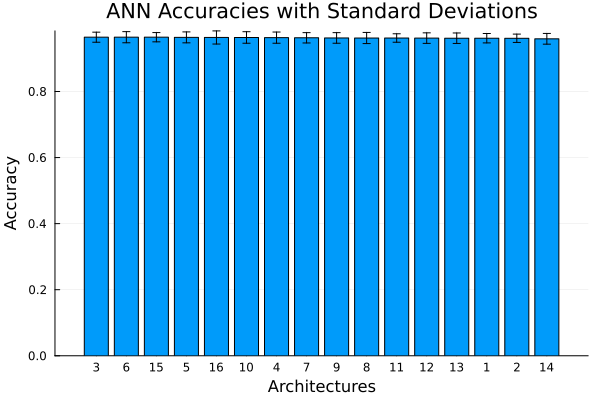

In [6]:
plot_acc_comparison(model, all_metrics)

### Discussion
Comparing all the expremient it can be stablished that ANN perform quiter well for this problem. After testing different architectures, the ones how achieve the greatest accuracy rate are `[128]` and sigmoind activation function and `[128, 64]` with relu activation function, both starting with a hidden layer with 128 neurons. It also can be concluded that when using relu activation function, topologies with two hidden layers leads to better results and when using sigmoid activation functions, the better topologies will have one hidden layer.

Now, it will be checked if changing the leaning rate could return better results than the previous ones.


In [7]:
# Define an array of hyperparameter dictionaries for the Decision Tree model
hyperparameters = [
        Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
        Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
        Dict("architecture" => [128], "activation" => fill(σ, 1), "learning_rate" => 0.1, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
        Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.001, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
        Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.01, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0),
        Dict("architecture" => [128, 64], "activation" => fill(Flux.relu, 2), "learning_rate" => 0.1, "validation_ratio" => 0.2, "n_iter_no_change" => 80, "max_iter" => 2000, "repetitionsTraining" => 10, "minLoss" => 0.0)
]

# Call the function to evaluate the model using different sets of hyperparameters and print the ranking of metrics.
all_metrics = evaluateAndPrintMetricsRanking(model, hyperparameters, train_input, train_tags, kFoldIndices);

# Saving the best acc result of the experiment
best_acc_result = (all_metrics[1][2]["acc"][1],all_metrics[1][2]["acc"][2])
push!(best_models_acc, best_acc_result); # Adding the best result to the list

Training with set of hyperparameters 1
Training with set of hyperparameters 2
Training with set of hyperparameters 3
Training with set of hyperparameters 4
Training with set of hyperparameters 5
Training with set of hyperparameters 6

----- acc means -----
Hyperparams set 2 -> 0.964 ± 0.014
Hyperparams set 4 -> 0.963 ± 0.015
Hyperparams set 3 -> 0.962 ± 0.016
Hyperparams set 1 -> 0.961 ± 0.014
Hyperparams set 5 -> 0.961 ± 0.017
Hyperparams set 6 -> 0.878 ± 0.087

----- sensitivity means -----
Hyperparams set 2 -> 0.964 ± 0.014
Hyperparams set 4 -> 0.963 ± 0.015
Hyperparams set 3 -> 0.962 ± 0.016
Hyperparams set 1 -> 0.961 ± 0.014
Hyperparams set 5 -> 0.961 ± 0.017
Hyperparams set 6 -> 0.878 ± 0.087

----- specificity means -----
Hyperparams set 2 -> 0.988 ± 0.005
Hyperparams set 4 -> 0.988 ± 0.005
Hyperparams set 3 -> 0.988 ± 0.006
Hyperparams set 5 -> 0.987 ± 0.006
Hyperparams set 1 -> 0.987 ± 0.005
Hyperparams set 6 -> 0.958 ± 0.034

----- ppv means -----
Hyperparams set 2 -> 0.965 ±

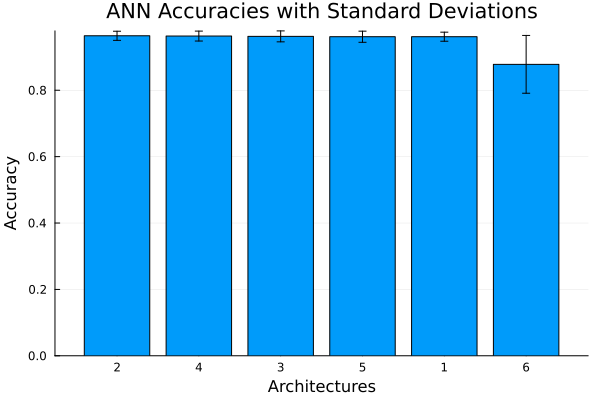

In [8]:
plot_acc_comparison(model, all_metrics)

## Discussion

Analyzing the results, it can be seen that the best performance is not superior than the achieved before. Besides, reducing the learningn rate for the model with the relu activation function has improved its accuracy rate.

## Final discussion

At the end, the results obtained in all the experiments are quite close (see the graph bellow), with very high accuracies. Furthermore, the best performing model has been the one with these hyperparameters:

    1. architecture : [128] 
    2. activation : fill(σ, 1) 
    3. learning_rate : 0.01 
    4. validation_ratio : 0.2 
    5. n_iter_no_change : 80 
    6. max_iter : 2000 
    7. repetitionsTraining : 10 
    8. minLoss : 0.0

As can be seen, in order to apply the early stopping technique we have used a 20% of the training data as a validation set. Additionaly, since ANNs are non-deterministic models, we have repeated the experiment 10 times (`repetitionsTraining = 10`), thus getting more reliable evaluations. 

All of this results in an **accuracy** of **0.964 ± 0.015**.

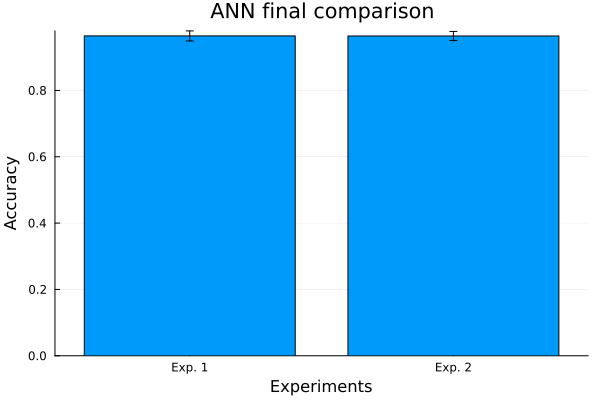

In [9]:
plot_final_comparison("ANN final comparison", best_models_acc)